#  AI CA4
# Data Processing and Machine Learning
## Name: Fatemeh Naeinian

### Student ID: 810099018


## Definition of project:
This project is an introduction to machine learning.
We will use KNN, Decision Tree, Random Forest, and Logistic regression classifier with scikit learn library, then we will optimize accuracy with grid search.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score, confusion_matrix

In [89]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [90]:
df = pd.read_csv('/content/gdrive/MyDrive/diabetes.csv')

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


## EDA
**1.** The describe() method os used for calculating some statistical information for numerical columns.
The info() is used to get information about data types, memory and number of data for each column.


In [92]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


**2.** The isna() method return true when a data is missing. So, with claculating summation of this method, we can find numbe of missing values for each column.

In [94]:
nan = df.isna().sum()
percentage_nan = nan/len(df)*100

print('number of nan data in each column')
print(nan)
print('\npercentage of nan data in each column')
print(percentage_nan)

number of nan data in each column
Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

percentage of nan data in each column
Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64


**3.** We can find correlation of features with corr() method.

we can see correlation between 'Age' and 'Pregnancies' , 'SkinThickness' and 'Insulin' , 'SkinThickness' and 'BMI' is very high.



In [95]:
numeric_cols = df.select_dtypes([np.number]).columns
categorical_cols = df.select_dtypes([np.object]).columns
print(categorical_cols)
print(numeric_cols)

Index([], dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


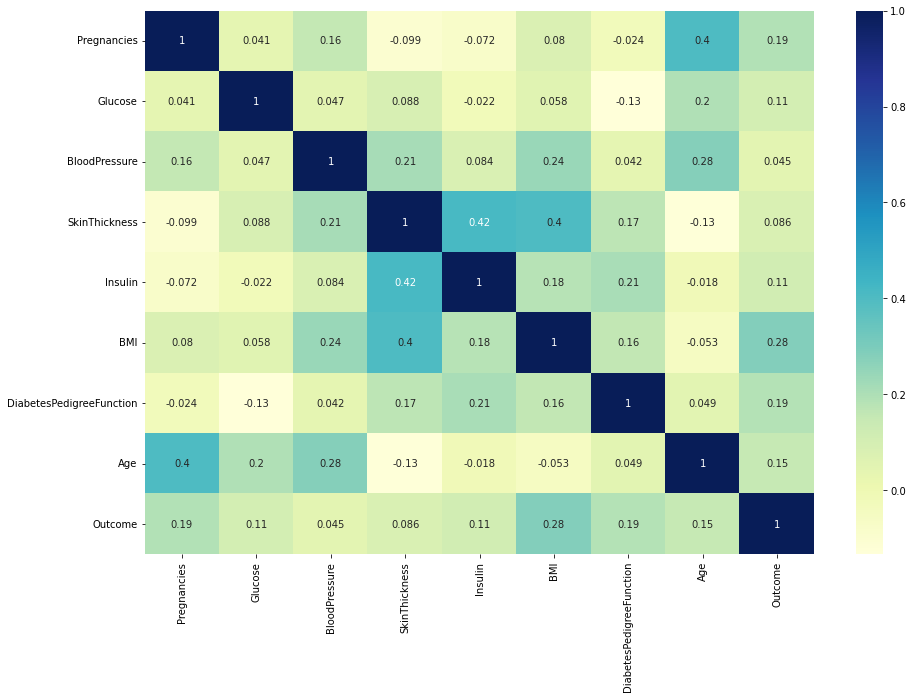

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

**4.** The distplot() method in seaborn library is used to show distribution of most correlated features.

**5.** As we can see, these distribution are very similar, So they might help in learning models.

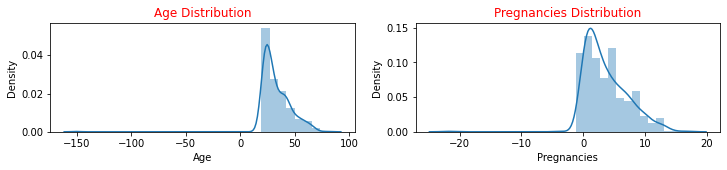

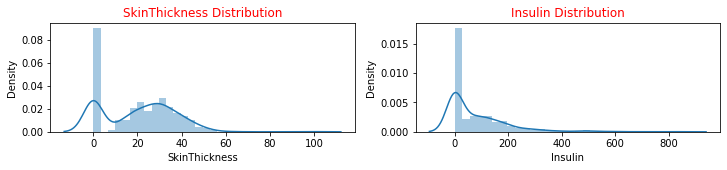

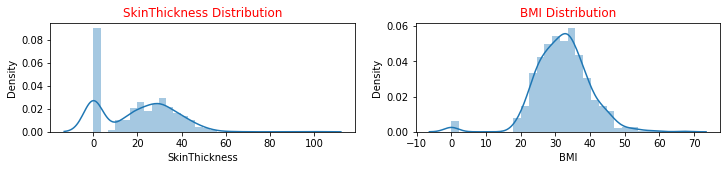

In [97]:
def plot(df, columns, m, n):
  fig=plt.figure(figsize=(12,2))
  for i, col in enumerate(columns):
      ax=fig.add_subplot(n,m,i+1)
      sns.distplot(df[col],ax=ax,bins=30)
      ax.set_title(col+" Distribution",color='red')
  plt.show()

col1 = ['Age','Pregnancies']
plot(df, col1, 2, 1)
col2 = ['SkinThickness','Insulin']
plot(df, col2, 2, 1)
col3 = ['SkinThickness','BMI']
plot(df, col3, 2, 1)

## Preprocessing
**1.** There are many ways for managing missing values:
  
  i) Eliminate column with missing values:
      A column is a feature for model, So, deleting the entire column can cause losing a lot of information. Anyways, it's possible that all columns have missing values. Practically it's not always possible to eliminate a column, but it can be done when a column has more than 70% missing values.

  ii) Eliminate rows with missing values:
      This method is simple and it could be done when missing data of a row is a lot. Eliminating can cause losing data.

  iii) Estimate missing values:
      Most common method of dealing with missing values is estimating missing values with mean() , median() , mode() and scipy.interpolate().
      When there are not many outliers, mean() , median() and mode() are appropriate. mean() is better for columns with continuous numbers, and mode() and median are better for columns with discrete numbers.
      Interpolation can be used for estimating a time series
      These methods increase the accuracy and prevent losing data, but it might have bias and underestimates variance.



**2.** We can see DiabetesPedigreeFunction has the most missing values. So, we delete missing values of this feature to help the model to be more accurate and robust.

By using mode() and fillna() method we can fill missing values.


In [98]:
nan = df.isna().sum()
print('number of nan data in each column')
print(nan)

number of nan data in each column
Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64


In [99]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mode()[0])
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**3.** Normalization or Min-Max scaling is used to transform features to a common scale, without distorting differences in the ranges of values. This scales the range to [0, 1] or sometimes [-1, 1]. Normalization is used when the data doesn't have Gaussian distribution. Normalization is highly affected by outliers.

$$ X_{new} = (X - X_{min})/(X_{max} - X_{min}) $$

Standardization or Z-score is the transformation of features by subtracting from mean and dividing by standard deviation.Then we will have a mean value of 0 and a standard deviation of 1. It is not bounded to a certain range. Standardization is used when we want to compare measurements that have different units. Standardization is used on data having Gaussian distribution. Standardization is slightly affected by outliers.

$$ X_{new} = (X - mean)/std $$



As we can see our data has a Gaussian distribution and also there are some outliers so we will use Standardization.

In [100]:
label = df['Outcome']
train = df
train = train.drop(['Outcome'],axis=1)
cols = train.columns

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train), columns=cols)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.824496,0.196266,0.165719,1.120655,-0.634972,0.219114,0.728082,1.383542
1,-0.665416,-0.140476,-0.157717,0.755941,-0.634972,-0.731770,-0.183221,-0.038594
2,-0.665416,0.383345,-0.265530,-1.006840,-0.634972,-1.180044,0.876664,0.036255
3,-0.665416,-0.119096,-0.157717,0.391228,0.206374,-0.528009,-0.790757,-0.787087
4,-0.665416,0.137470,-1.559276,1.120655,0.868710,-0.106904,-0.658684,0.111104


**4.** There are several different types of categorical data including:

Ordinal: A variable that has some order associated with it.

Nominal: A variable that has no numerical importance, for example color or city.

There are many ways to encode categorical data. We can see some of them in the below.

Ordinal Encoding:


This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.

One-Hot Encoding:


In One-Hot Encoding, each category of any categorical variable gets a new variable. It maps each category with binary numbers (0 or 1). This type of encoding is used when the data is nominal. Newly created binary features can be considered dummy variables. After one hot encoding, the number of dummy variables depends on the number of categories presented in the data.

Effect Encoding:


In this type of encoding, encoders provide values to the categories in -1,0,1 format. -1 formation is the only difference between One-Hot encoding and effect encoding.


these methods can be used only when categorical data has a little variety. For example, if a column consists of names, it won't add any information. So we can eliminate it.

**5.** Yes, we can eliminate columns with less correlation to the target, because they doesn't add information. also between correlated features which are correlated to the target, we can eliminate some of them to make algorithm faster.

In [101]:
df = df.drop(['DiabetesPedigreeFunction'],axis=1)

**6.** The optimum split percentage depends on the data.

* More training data means model sees more examples and thus finds a better solution. But with less training data, the parameter estimates have a higher variance.

* It is important that test set represents most of the variance in the dataset. Less testing data leads to high variance in performance measures.

common split percentages include:<br/>
Train: 80%, Test: 20%<br/>
Train: 67%, Test: 33%<br/>
Train: 50%, Test: 50%<br/>

Random split:

Data might be sorted by some feature or it might have autocorrelation. So random split is needed to ensure that the train and test datasets are representative of the original dataset. Otherwise, 
train and test splits might end up being biased.

Stratify: 

The proportions of the target variable must be same among train and test set in order to represent the true distribution of the data. 

**7.** The validation set is a set of data, separate from the training set, that is used to validate our model performance during training. This validation process gives information that helps us tune the model’s hyperparameters and configurations accordingly. This mostly used when we train a model during some epochs.


In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, label, test_size = 0.2, random_state = 1)
len(X_train), len(X_test), len(y_train), len(y_test)

(614, 154, 614, 154)

**1.** Evaluating models

  Accuracy = TP+TN/TP+FP+FN+TN

  Precision = TP/TP+FP

  Recall = TP/TP+FN

  F1 Score = 2*(Recall * Precision) / (Recall + Precision)




In [103]:
def report(model, test, Y_test):
  y_pred = model.predict(test)
  accuracy = accuracy_score(Y_test, y_pred)
  print('Accuracy Test: %f' % accuracy)
  precision = precision_score(Y_test, y_pred, average='macro')
  print('Precision Test: %f' % precision)
  recall = recall_score(Y_test, y_pred, average='macro')
  print('Recall Test: %f' % recall)
  f1 = f1_score(Y_test, y_pred, average='macro')
  print('F1 score Test: %f' % f1)

  print(classification_report(Y_test, y_pred))
  mat = confusion_matrix(Y_test, y_pred)
  sns.heatmap(mat, annot=True, cmap='Spectral')

## K-Nearest-Neighbours

best number of neighbours =  19


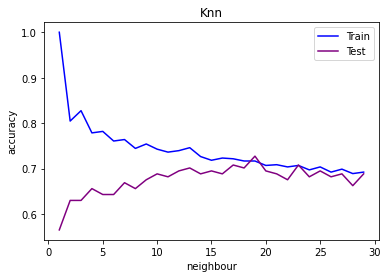

In [104]:
neighbour = list(range(1,30,1))
train_acc = []
test_acc = []

for n in neighbour:
  model = KNeighborsClassifier(n_neighbors=n)
  model = model.fit(X_train, y_train)
  ypred_test = model.predict(X_test)
  ypred_train = model.predict(X_train)
  train_acc.append(metrics.accuracy_score(y_train,ypred_train))
  test_acc.append(metrics.accuracy_score(y_test,ypred_test))

plt.plot(neighbour, train_acc, label='Train', color='blue')
plt.plot(neighbour, test_acc, label='Test', color='purple')
plt.xlabel('neighbour')
plt.ylabel('accuracy')
plt.title('Knn')
plt.legend()
print('best number of neighbours = ', np.argmax(test_acc)+1)

In [105]:
parameters ={'n_neighbors': list(range(1, 40, 2))}

model = KNeighborsClassifier()

grid = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=10)
          
grid.fit(X_train,y_train)
print("Best Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Best Hyperparameters : {'n_neighbors': 13}
Accuracy : 0.6954521417239555


Accuracy Test: 0.727273
Precision Test: 0.761905
Recall Test: 0.634343
F1 score Test: 0.633167
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        99
           1       0.81      0.31      0.45        55

    accuracy                           0.73       154
   macro avg       0.76      0.63      0.63       154
weighted avg       0.75      0.73      0.69       154



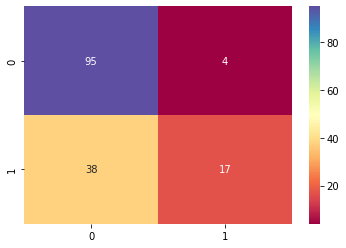

In [130]:
model = KNeighborsClassifier(n_neighbors=19)
model = model.fit(X_train, y_train)
report(model, X_test, y_test)

## Logistic Regression

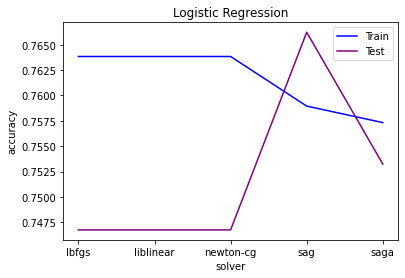

In [107]:
solver = ['lbfgs','liblinear','newton-cg','sag','saga']
train_acc = []
test_acc = []

for s in solver:
  model = LogisticRegression(solver = s, penalty='l2', C=10)
  model = model.fit(X_train, y_train)
  ypred_test = model.predict(X_test)
  ypred_train = model.predict(X_train)
  train_acc.append(metrics.accuracy_score(y_train,ypred_train))
  test_acc.append(metrics.accuracy_score(y_test,ypred_test))

plt.plot(solver, train_acc, label='Train', color='blue')
plt.plot(solver, test_acc, label='Test', color='purple')
plt.xlabel('solver')
plt.ylabel('accuracy')
plt.title('Logistic Regression')
plt.legend()

In [108]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['lbfgs','liblinear','newton-cg','sag','saga'],
}

model = LogisticRegression()

grid = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=10)
          
grid.fit(X_train,y_train)
print("Best Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Best Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.7605764145954521


Accuracy Test: 0.766234
Precision Test: 0.768067
Recall Test: 0.705051
F1 score Test: 0.717431
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        99
           1       0.77      0.49      0.60        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.77      0.75       154



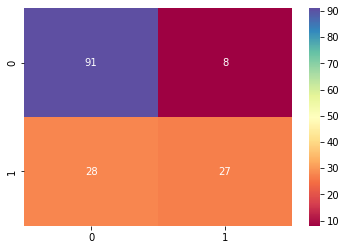

In [128]:
model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs')
model = model.fit(X_train, y_train)
report(model, X_test, y_test)

## Decision Trees

best number of depth =  4


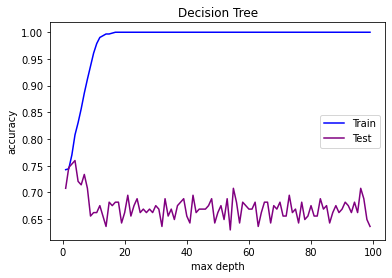

In [110]:
max_depth = list(range(1,100,1))
train_acc = []
test_acc = []

for n in max_depth:
  model = DecisionTreeClassifier(max_depth = n)
  model = model.fit(X_train, y_train)
  ypred_test = model.predict(X_test)
  ypred_train = model.predict(X_train)
  train_acc.append(metrics.accuracy_score(y_train,ypred_train))
  test_acc.append(metrics.accuracy_score(y_test,ypred_test))

plt.plot(max_depth, train_acc, label='Train', color='blue')
plt.plot(max_depth, test_acc, label='Test', color='purple')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('Decision Tree')
plt.legend()
print('best number of depth = ', np.argmax(test_acc)+1)

best number of leaf =  17


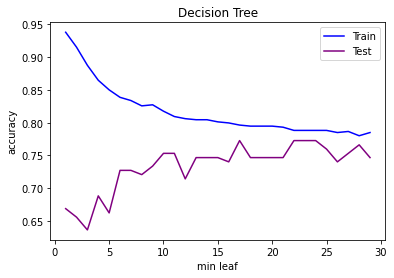

In [111]:
min_leaf = list(range(1,30,1))
train_acc = []
test_acc = []

for n in min_leaf:
  model = DecisionTreeClassifier(max_depth = 9, min_samples_leaf=n)
  model = model.fit(X_train, y_train)
  ypred_test = model.predict(X_test)
  ypred_train = model.predict(X_train)
  train_acc.append(metrics.accuracy_score(y_train,ypred_train))
  test_acc.append(metrics.accuracy_score(y_test,ypred_test))

plt.plot(min_leaf, train_acc, label='Train', color='blue')
plt.plot(min_leaf, test_acc, label='Test', color='purple')
plt.xlabel('min leaf')
plt.ylabel('accuracy')
plt.title('Decision Tree')
plt.legend()
print('best number of leaf = ', np.argmax(test_acc)+1)

In [112]:
parameters = {'max_depth': list(range(1,20, 2)), 
              'min_samples_leaf' : list(range(1, 5))}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=10)
          
grid.fit(X_train,y_train)
print("Best Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Best Hyperparameters : {'max_depth': 5, 'min_samples_leaf': 1}
Accuracy : 0.726388154415653


Accuracy Test: 0.740260
Precision Test: 0.740886
Recall Test: 0.668687
F1 score Test: 0.677352
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        99
           1       0.74      0.42      0.53        55

    accuracy                           0.74       154
   macro avg       0.74      0.67      0.68       154
weighted avg       0.74      0.74      0.72       154



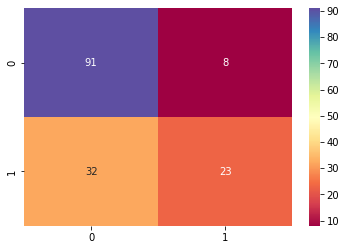

In [122]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=17)
model = model.fit(X_train, y_train)
report(model, X_test, y_test)

**3.** Underfitting and Overfitting

Overfitting:

Overfitting is the case where the overall cost is really small, but the generalization of the model is unreliable. This is due to the model learning “too much” from the training data set. model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on unseen data, but the model has a high accuracy on training data.

Underfitting:

Underfitting happens when model is not complex enough to accurately capture relationships between a dataset’s features and a target variable. An underfitted model results in problematic or erroneous outcomes on new data and often performs poorly even on training data.

KNN: It can be observed from the KNN plot that too low value of k leads to overfitting and too big value of k leads to underfitting.

Logistic Regression: Logistic regression models tend to overfit the data, particularly in high-dimensional settings.


Decision Trees: It can be observed from the plot taht high depth leads to overfitting because with high depth the tree ends up having branches with strict rules of sparse data. At very low depths, undertraining and lack of complexity results in underfitting.


**4.** Impact of preprocessing on accuracy with droping column with most Nan and without standardization


In [114]:
def runModels(X_train, X_test, y_train, y_test):
    Dt = DecisionTreeClassifier(max_depth = 8)
    Dt = Dt.fit(X_train, y_train)
    tree_ytest_pred = Dt.predict(X_test)
    tree_ytrain_pred = Dt.predict(X_train)
    print("\nDecision Tree:")
    print("\tAccuracy on train set = ",metrics.accuracy_score(y_train, tree_ytrain_pred))
    print("\tAccuracy on test set = ",metrics.accuracy_score(y_test, tree_ytest_pred))

    knn = KNeighborsClassifier(n_neighbors=15)
    knn = knn.fit(X_train, y_train)
    knn_ytest_pred = knn.predict(X_test)
    knn_ytrain_pred = knn.predict(X_train)
    print("KNN:")
    print("\tAccuracy on train set = ",metrics.accuracy_score(y_train, knn_ytrain_pred))
    print("\tAccuracy on test set = ",metrics.accuracy_score(y_test, knn_ytest_pred))
    
    LR = LogisticRegression(C=10.0, penalty='l1', solver='saga')
    LR = LR.fit(X_train, y_train)
    LR_ytest_pred = LR.predict(X_test)
    LR_ytrain_pred = LR.predict(X_train)
    print("Logistic Regression:")
    print("\tAccuracy on train set = ",metrics.accuracy_score(y_train, LR_ytrain_pred))
    print("\tAccuracy on test set = ",metrics.accuracy_score(y_test, LR_ytest_pred))


without standardization

In [115]:
df_new1 = pd.read_csv('/content/gdrive/MyDrive/diabetes.csv')
for col in df_new1.columns:
  df_new1[col] = df_new1[col].fillna(df_new1[col].mode()[0])

label1 = df_new1['Outcome']
train1 = df_new1
train1 = train1.drop(['Outcome'],axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(train1, label1, test_size = 0.2, random_state = 1)
runModels(X_train1, X_test1, y_train1, y_test1)



Decision Tree:
	Accuracy on train set =  0.9087947882736156
	Accuracy on test set =  0.7207792207792207
KNN:
	Accuracy on train set =  0.760586319218241
	Accuracy on test set =  0.7727272727272727
Logistic Regression:
	Accuracy on train set =  0.6807817589576547
	Accuracy on test set =  0.6168831168831169


with droping column with most Nan

In [116]:
df_new2 = pd.read_csv('/content/gdrive/MyDrive/diabetes.csv')
for col in df_new2.columns:
  df_new2[col] = df_new2[col].fillna(df_new2[col].mode()[0])

label2 = df_new2['Outcome']
train2 = df_new2
train2 = train2.drop(['Outcome','SkinThickness','Pregnancies','Glucose','DiabetesPedigreeFunction','Age'],axis=1)
cols = train2.columns
scaler = StandardScaler()
df_scaled2 = pd.DataFrame(scaler.fit_transform(train2), columns=cols)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_scaled2, label2, test_size = 0.2, random_state = 1)
runModels(X_train2, X_test2, y_train2, y_test2)


Decision Tree:
	Accuracy on train set =  0.7719869706840391
	Accuracy on test set =  0.5974025974025974
KNN:
	Accuracy on train set =  0.7003257328990228
	Accuracy on test set =  0.6688311688311688
Logistic Regression:
	Accuracy on train set =  0.6742671009771987
	Accuracy on test set =  0.6753246753246753


## Random Forest

**1.**
max_depth :

max_depth represents the depth of each tree in the forest which is the longest path between the root node and the leaf node. The deeper the tree, the more splits it has and it captures more information about the data.

n_estimators:

n_estimators represents the number of trees in the forest. Using many trees will help to get a more generalized result and prevent from any overfitting, but can certainly increase the time complexity of the model. 

min_samples_leaf : '

min_samples_leaf is The minimum number of samples required to be at a leaf node. The larger value of min_samples_leaf helps to reduce overfitting, since it controlles the growth of the tree. 

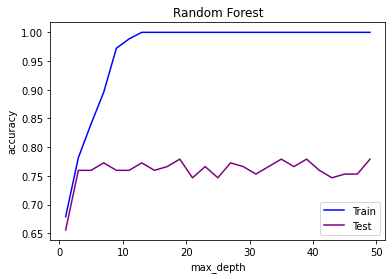

best accuracy is achived with max_depth  =  19 




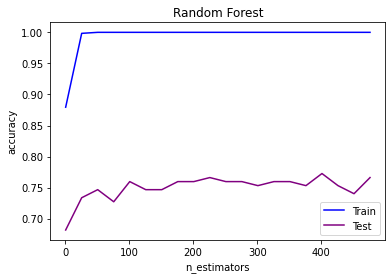

best accuracy is achived with n_estimators  =  401 




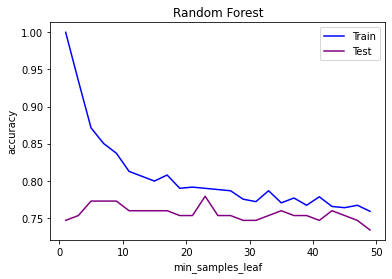

best accuracy is achived with min_samples_leaf  =  23 




In [118]:
def RF(param_list,parameter):
  train_acc = []
  test_acc = []
  for i in param_list :
    if parameter=="max_depth" : 
      model = RandomForestClassifier(max_depth=i)
    if parameter=="n_estimators": 
      model = RandomForestClassifier(n_estimators=i)
    if parameter=="min_samples_leaf": 
      model = RandomForestClassifier(min_samples_leaf=i)
      
    model = model.fit(X_train, y_train)
    ypred_test = model.predict(X_test)
    ypred_train = model.predict(X_train)
    train_acc.append(metrics.accuracy_score(y_train,ypred_train))
    test_acc.append(metrics.accuracy_score(y_test,ypred_test))

  
  plt.plot(param_list, train_acc, label='Train', color='blue')
  plt.plot(param_list, test_acc, label='Test', color='purple')
  plt.xlabel(parameter)
  plt.ylabel('accuracy')
  plt.title('Random Forest')
  plt.legend()
  plt.show()
  print("best accuracy is achived with", parameter," = ",param_list[np.argmax(test_acc)],"\n\n")


RF(list(range(1, 50, 2)), parameter="max_depth")
RF(list(range(1, 500, 25)), parameter="n_estimators")
RF(list(range(1, 50, 2)), parameter="min_samples_leaf")

Accuracy Test: 0.753247
Precision Test: 0.754821
Recall Test: 0.686869
F1 score Test: 0.697727
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        99
           1       0.76      0.45      0.57        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.73       154



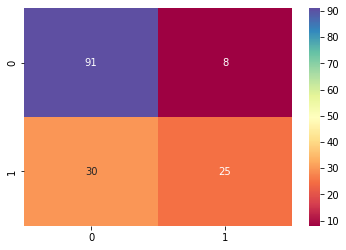

In [120]:
model =RandomForestClassifier(max_depth=19, min_samples_leaf=23, n_estimators=401)
model = model.fit(X_train, y_train)
report(model, X_test, y_test)

**2.** Decision trees have low bias because they try to overfit to the training data. Random forest also achive low bias because it uses some trees with low bias. But the difference is in variance, random forest uses some techniques to reduce variance in prediction. it is done by averaging trees with low correlation. 